<a href="https://colab.research.google.com/github/kalswjd/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0712_MachineLearning_01_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

https://m.blog.naver.com/bestinall/221760380344
이론 참고

## 1.이론

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.2 MB/s eta 0:00:00


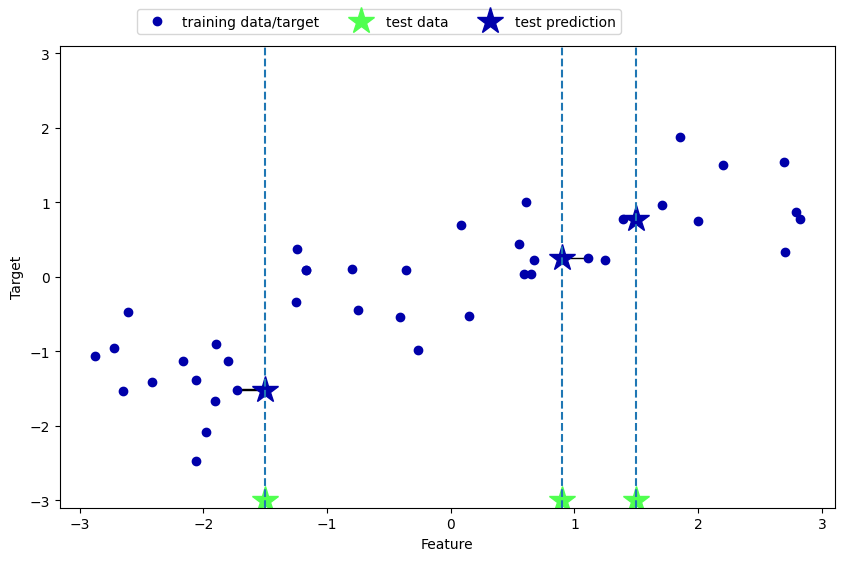

In [ ]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

mglearn.plots.plot_knn_regression()

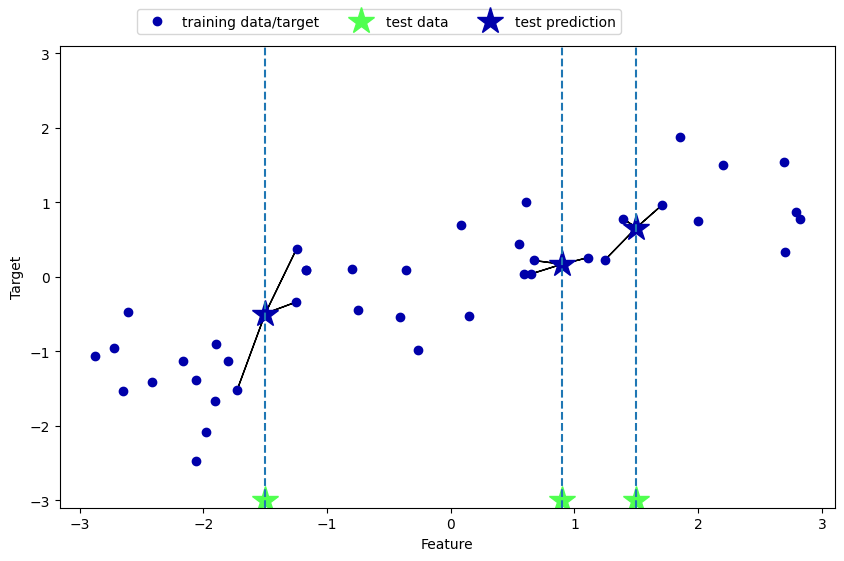

In [ ]:

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:

X, y = make_classification(n_samples=30, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_classes=2, random_state=1)

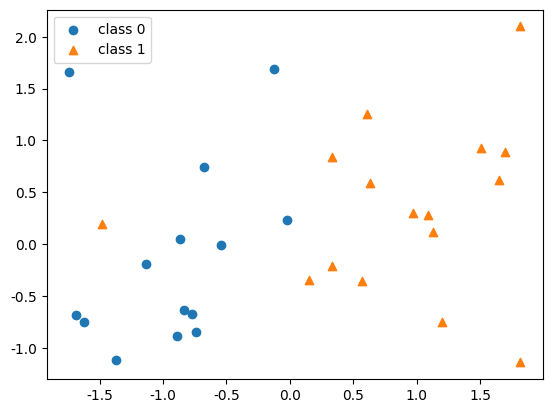

In [ ]:


mlp.rcParams['axes.unicode_minus'] = False # 축에 음수 표시
fig, ax = plt.subplots()
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');
ax.legend(loc='best')

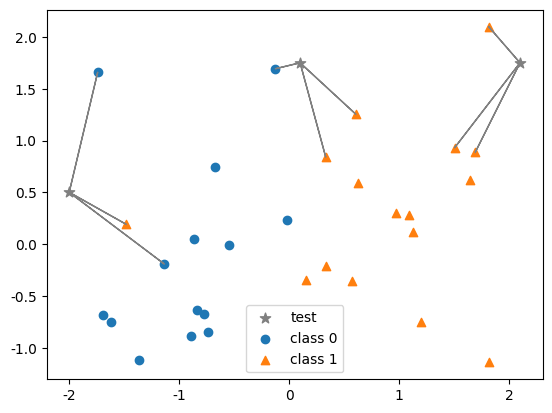

In [ ]:
n_neighbors=3
X_test = np.array([[0.1, 1.75], [-2.0, 0.5], [2.1, 1.75]])


dist = euclidean_distances(X, X_test)
closest = np.argsort(dist, axis=0)

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], c='gray', marker='*', s=60, label='test')
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');

for x, neighbors in zip(X_test, closest.T):
  for neighbor in neighbors[:n_neighbors]:
    ax.arrow(x[0], x[1], X[neighbor, 0] - x[0], X[neighbor, 1] - x[1], head_width=0, fc='gray', ec='gray')
    ax.legend(loc='best')


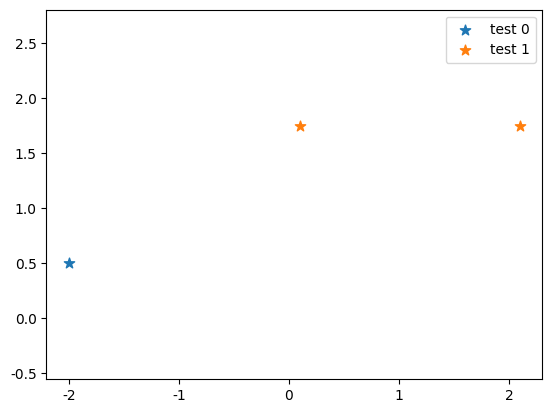

In [ ]:

knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
y_pred = knn.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c='C0', marker='*', s=60, label='test 0');
ax.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='C1', marker='*', s=60, label='test 1');

ax.axis('equal');
handles, labels = ax.get_legend_handles_labels();
ax.legend(handles=handles, loc='best');


## 2.실습

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


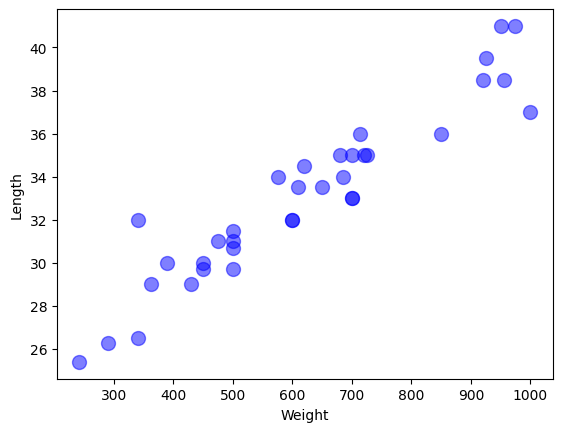

In [ ]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species'] =='Bream']
plt.plot('Weight',  # x
         'Length',  # y
         data=bream_data,
         linestyle='none',
         marker='o',
         markersize=10,
         color='blue',
         alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

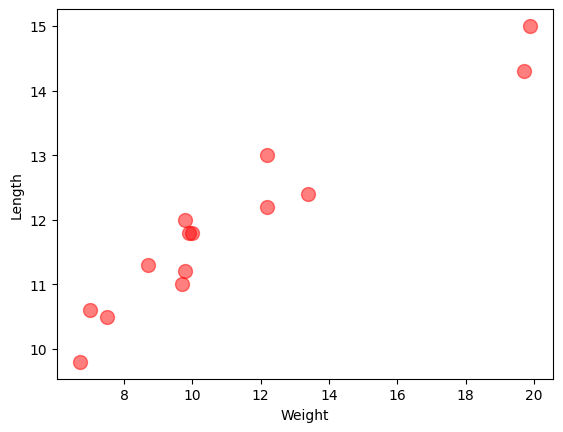

In [ ]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species'] =='Smelt']

plt.plot('Weight',  # x
         'Length',  # y
         data=bream_data,
         linestyle='none',
         marker='o',
         markersize=10,
         color='red',
         alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [ ]:
fish.groupby('Species').count()

# 7종의 물고기가 있습니다

,Weight,Length,Diagonal,Height,Width
Species,,,,,
Bream,35,35,35,35,35
Parkki,11,11,11,11,11
Perch,56,56,56,56,56
Pike,17,17,17,17,17
Roach,20,20,20,20,20
Smelt,14,14,14,14,14
Whitefish,6,6,6,6,6


In [ ]:
# 방어와 도미 데이터만 뽑아내기
breamSmelt = fish[(fish['Species'] =='Bream')|(fish['Species']=='Smelt')]
print(breamSmelt)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
5     Bream   450.0    29.7      34.7  13.6024  4.9274
6     Bream   500.0    29.7      34.5  14.1795  5.2785
7     Bream   390.0    30.0      35.0  12.6700  4.6900
8     Bream   450.0    30.0      35.1  14.0049  4.8438
9     Bream   500.0    30.7      36.2  14.2266  4.9594
10    Bream   475.0    31.0      36.2  14.2628  5.1042
11    Bream   500.0    31.0      36.2  14.3714  4.8146
12    Bream   500.0    31.5      36.4  13.7592  4.3680
13    Bream   340.0    32.0      37.3  13.9129  5.0728
14    Bream   600.0    32.0      37.2  14.9544  5.1708
15    Bream   600.0    32.0      37.2  15.4380  5.5800
16    Bream   700.0    33.0      38.3  14.8604  5.2854
17    Brea

In [ ]:
# 원핫인코딩 간단하게 0,1 분류
breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)
print(breamSmelt)

     Species  Weight  Length  Diagonal   Height   Width
0          0   242.0    25.4      30.0  11.5200  4.0200
1          0   290.0    26.3      31.2  12.4800  4.3056
2          0   340.0    26.5      31.1  12.3778  4.6961
3          0   363.0    29.0      33.5  12.7300  4.4555
4          0   430.0    29.0      34.0  12.4440  5.1340
5          0   450.0    29.7      34.7  13.6024  4.9274
6          0   500.0    29.7      34.5  14.1795  5.2785
7          0   390.0    30.0      35.0  12.6700  4.6900
8          0   450.0    30.0      35.1  14.0049  4.8438
9          0   500.0    30.7      36.2  14.2266  4.9594
10         0   475.0    31.0      36.2  14.2628  5.1042
11         0   500.0    31.0      36.2  14.3714  4.8146
12         0   500.0    31.5      36.4  13.7592  4.3680
13         0   340.0    32.0      37.3  13.9129  5.0728
14         0   600.0    32.0      37.2  14.9544  5.1708
15         0   600.0    32.0      37.2  15.4380  5.5800
16         0   700.0    33.0      38.3  14.8604 

<ipython-input-8-8eda715f7be6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)


In [ ]:
target = list(breamSmelt['Species'].values)

data = breamSmelt[['Length','Weight']].values.tolist()

train_input,test_input,train_target,test_target = train_test_split(
    data,target,stratify=target)

print(test_target)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target) #fish_data 로 최근접 이웃 훈련
kn.score(test_input,test_target)  #정확도 평가

1.0

In [ ]:
# 데이터 전처리
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
fish['Species'] = le.fit_transform(fish['Species'])
print(le.classes_) # class 분류 확인

X = fish.drop('Species', axis=1)
y = fish['Species']
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

[0 1 2 3 4 5 6]


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
# 과대적합과 과소적합

# 테스트 데이터 예측
y_train_pred = knn.predict(X_train)

# 정확도 계산
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8110236220472441


In [ ]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 과대적합과 과소적합

# 테스트 데이터 예측
y_train_pred = knn.predict(X_train)

# 정확도 계산
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8976377952755905


In [ ]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


## 3.최적화

In [ ]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 필요한 패키지 설치
!pip install mglearn
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
df = pd.read_excel("/content/Raisin_Dataset.xlsx")

# 데이터 샘플 확인
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분리 (6:4)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [ ]:
# uniform은 이웃한 관측치와의 거리에 가중치를 주지 않는 옵션
# n_neighbors = 3을 주어서 이웃한 3개의 관측치를 기반으로 분류를 합니다.

In [ ]:
# 기본 K-nn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors = 3,
                                  weights='uniform')
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8925925925925926
0.8444444444444444


In [ ]:
# 거리 가중치를 적용하지 않는 모델에서 k이웃의 갯수를 1~30까지 늘려가면서 오분류율을
# 시각화 합니다.
# 이웃의 갯수가 5개가 되면서 오분류율이 15%대로 낮아지고, 12개가 될때 가장 낮은 것을 볼 수 있습니다.
# 그러나 너무 많은 이웃은 과적합을 유도할 수 있으므로 6개정도로 협의를 해도 좋을것 같습니다.
# 컴피티션의 경우에는 12개를 써야겠죠?

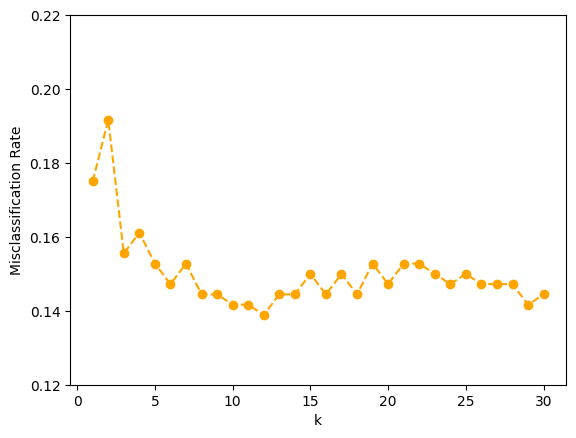

In [ ]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.12, 0.22)
plt.show()

In [ ]:
# 거리 가중치를 적용한 모델은 어떻게 되는지에 대해서 살펴봅시다.
# 앞서 가중치를 미적용한 모델에 비해 오분류율이 감소한 것을 확인할 수 있고, 변동성도 줄어든것을 확인할 수 있어요.

거리가중치(Distance Weighting)는 KNN(K-Nearest Neighbors) 알고리즘에서 사용되는 옵션 중 하나입니다. KNN은 주어진 데이터 포인트와 가장 가까운 이웃들의 투표를 기반으로 예측을 수행합니다. 일반적으로는 이웃들의 수를 지정하여 다수결 투표를 진행하는데, 거리가중치를 적용하면 이웃들의 투표에 거리에 따른 가중치를 부여합니다.

거리가중치를 사용하면 가까운 이웃들이 예측에 더 큰 영향력을 가지고, 먼 이웃들은 예측에 더 적은 영향력을 갖게 됩니다. 가중치는 일반적으로 거리에 반비례하도록 설정되는데, 가까운 이웃일수록 큰 가중치를 부여하고, 먼 이웃일수록 작은 가중치를 부여합니다. 이를 통해 거리에 기반한 가중 평균을 사용하여 예측을 수행하게 됩니다.

거리가중치를 적용하려면 KNeighborsClassifier 클래스의 weights 매개변수를 "distance"로 설정해야 합니다. 예를 들면 다음과 같이 코드를 작성할 수 있습니다:

python
Copy code
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(weights='distance')
kn.fit(train_input, train_target)
accuracy = kn.score(test_input, test_target)
위의 코드에서 weights='distance'는 거리가중치를 사용하도록 설정하는 부분입니다. 이후 학습과 평가 과정은 기존의 KNN과 동일합니다. 거리가중치를 사용하면 가까운 이웃의 영향력이 강조되므로, 일부 이상치(outlier)나 노이즈에 대해 더 강건한 모델을 만들 수 있습니다.

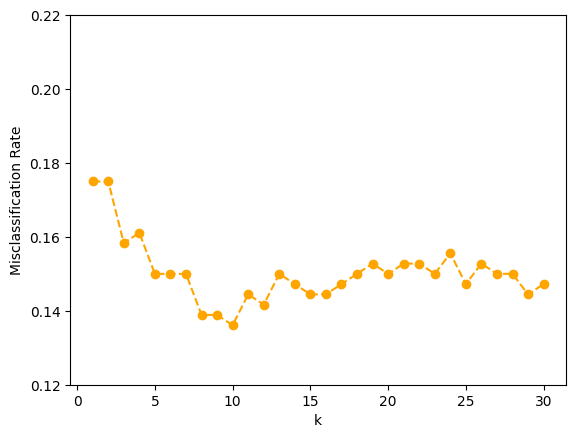

In [ ]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.12, 0.22)
plt.show()

In [ ]:
# 오분류율은 계속적으로 낮아지지 않음을 볼 수 있습니다.

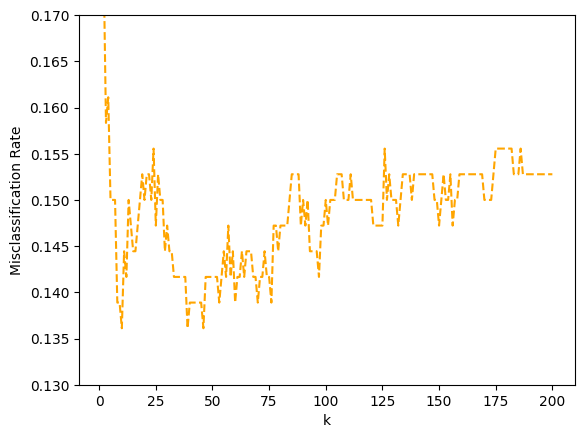

In [ ]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

In [ ]:
# PCA를 사용하면 여러변수가 가지고 있는 다차원 n차원을 2차원으로 줄여서 확인할 수 있습니다.
# 그 2개의 변수로 이웃수를 바꿔서 어떻게 결정경계선이 달라지는지 확인할 수 있습니다.
# 5개와 20개는 크게 차이가 나는것처럼 보이지 않습니다.


In [ ]:
# 시각화를 위한 차원 축소

# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,0.015601,-0.196276
1,-0.057779,-0.007590
2,0.131111,0.171807
3,0.207903,-0.073944
4,-0.175377,-0.140094


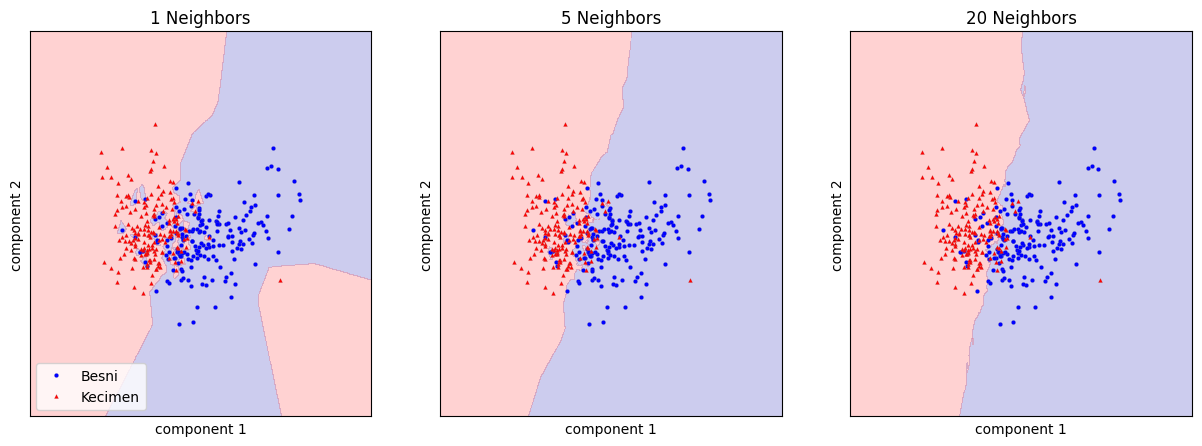

In [ ]:
# 결정 경계선(decision boundary) 시각화 확인

# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 이웃 수 1, 5, 20에 따른 결정경계 시각화
for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x,
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1],
                             df_vsl_y, markeredgewidth=0.1,
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)